# problem statement
classify the Forest Fire Size_Categorie using SVM

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
data = pd.read_csv("C:\\Users\\ubed shaikh\\OneDrive\\Desktop\\Data Science\\forestfires.csv")
data[:3]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small


In [3]:
label_encoder = preprocessing.LabelEncoder()
data['month'] = label_encoder.fit_transform(data['month'])
data['month'].unique()

array([ 7, 10,  1, 11,  0,  6,  5,  3,  4,  2,  8,  9])

In [4]:
data['day'] = label_encoder.fit_transform(data['day'])
data['day'].unique()

array([0, 5, 2, 3, 1, 6, 4])

In [5]:
train, test = train_test_split(data, test_size = 0.3, random_state = 0)

In [6]:
train[:3]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
390,3,1,84.7,9.5,58.3,4.1,7.5,71,6.3,0.0,...,1,0,0,0,0,0,0,0,0,large
5,1,3,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
141,1,6,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,...,0,0,0,0,0,0,0,0,0,small


In [7]:
train_X = train.iloc[:,:-1]
train_y = train.iloc[:,-1]
test_X = test.iloc[:,:-1]
test_y = test.iloc[:,-1]

In [8]:
model_linear = SVC(kernel = "linear")
model_linear.fit(train_X, train_y)
pred_test_linear = model_linear.predict(test_X)

np.mean(pred_test_linear == test_y)

0.967948717948718

In [9]:
model_linear = SVC(kernel = "poly")
model_linear.fit(train_X, train_y)
pred_test_linear = model_linear.predict(test_X)

np.mean(pred_test_linear == test_y)


0.7564102564102564

In [10]:
model_linear = SVC(kernel = "rbf")
model_linear.fit(train_X, train_y)
pred_test_linear = model_linear.predict(test_X)

np.mean(pred_test_linear == test_y)

0.7243589743589743

In [11]:
train_X.shape, train_y.shape,
test_X.shape, test_y.shape

((156, 30), (156,))

In [12]:
import warnings
warnings.filterwarnings("ignore")
clf = SVC()
param_grid = [{'kernel' : ['rbf'],'gamma':[50,5,10,0,5,0,1],'C':[25,22,20,18,16,15,14,13,12,11,10,0,1,0.001]}]
gsv = GridSearchCV(clf, param_grid,cv=10)
gsv.fit(train_X,train_y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [25, 22, 20, 18, 16, 15, 14, 13, 12, 11, 10, 0,
                                1, 0.001],
                          'gamma': [50, 5, 10, 0, 5, 0, 1],
                          'kernel': ['rbf']}])

In [13]:
gsv.best_params_,gsv.best_score_

({'C': 25, 'gamma': 1, 'kernel': 'rbf'}, 0.7479729729729729)

In [14]:
clf = SVC(C=22, gamma = 0.1)
clf.fit(train_X,train_y)
pred_y = clf.predict(test_X)

In [15]:
accuracy = accuracy_score(test_y, pred_y)*100
accuracy

71.15384615384616

In [16]:
confusion_matrix(test_y, pred_y)

array([[  1,  45],
       [  0, 110]], dtype=int64)

In [17]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

       large       1.00      0.02      0.04        46
       small       0.71      1.00      0.83       110

    accuracy                           0.71       156
   macro avg       0.85      0.51      0.44       156
weighted avg       0.80      0.71      0.60       156



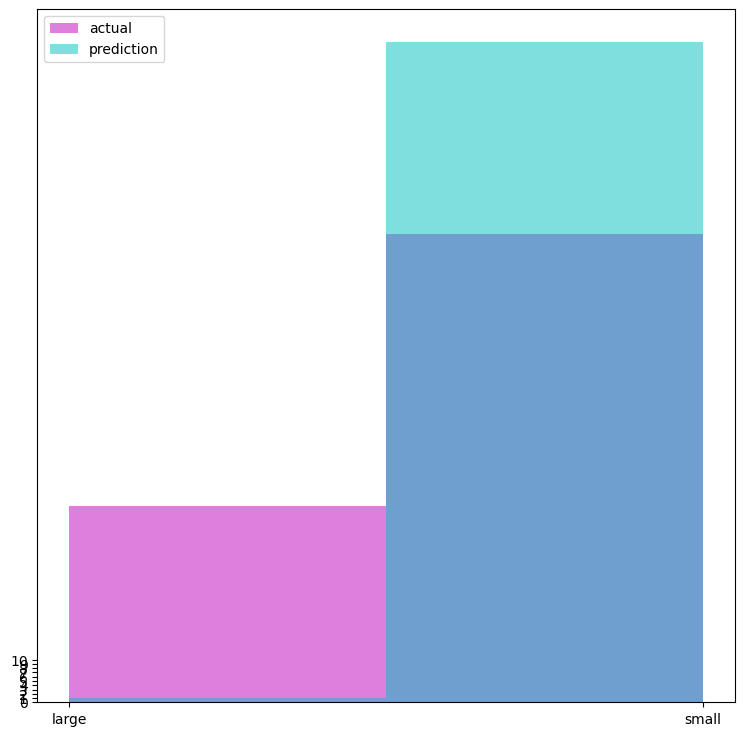

In [18]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9,9)
_, ax = plt.subplots()
ax.hist(test_y, color = 'm',alpha = 0.5, label = 'actual', bins = 2)
ax.hist(pred_y, color = 'c',alpha = 0.5, label = 'prediction', bins = 2)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')
plt.show()

# Conclusion:-
 SVC model is predict the test dataset with 71% accuracy